In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/US-pumpkins.csv")

In [3]:
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
df.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [6]:
df_reduced = df[["City Name", "Date", "Package", "Low Price", "High Price"]]

In [7]:
df_reduced['Price'] = (df_reduced["Low Price"]+df_reduced["High Price"])/2

C:\Users\HP\AppData\Local\Temp\ipykernel_6264\727729697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Price'] = (df_reduced["Low Price"]+df_reduced["High Price"])/2


In [8]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Price
0,BALTIMORE,4/29/17,24 inch bins,270.00,280.00,275.00
1,BALTIMORE,5/6/17,24 inch bins,270.00,280.00,275.00
2,BALTIMORE,9/24/16,24 inch bins,160.00,160.00,160.00
3,BALTIMORE,9/24/16,24 inch bins,160.00,160.00,160.00
4,BALTIMORE,11/5/16,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...,...
1752,ST. LOUIS,9/30/16,22 lb cartons,14.75,14.75,14.75
1753,ST. LOUIS,9/26/16,36 inch bins,275.00,275.00,275.00
1754,ST. LOUIS,9/27/16,36 inch bins,275.00,275.00,275.00
1755,ST. LOUIS,9/28/16,36 inch bins,275.00,275.00,275.00


In [9]:
df_reduced = df_reduced[df_reduced['Package'].str.contains('bushel')] # Filter rows that fulfill the condition inside of the []

In [10]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Price
70,BALTIMORE,9/24/16,1 1/9 bushel cartons,15.00,15.0,15.000
71,BALTIMORE,9/24/16,1 1/9 bushel cartons,18.00,18.0,18.000
72,BALTIMORE,10/1/16,1 1/9 bushel cartons,18.00,18.0,18.000
73,BALTIMORE,10/1/16,1 1/9 bushel cartons,17.00,17.0,17.000
74,BALTIMORE,10/8/16,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...,...
1738,ST. LOUIS,9/30/16,1/2 bushel cartons,15.00,15.0,15.000
1739,ST. LOUIS,9/30/16,1/2 bushel cartons,13.75,15.0,14.375
1740,ST. LOUIS,9/30/16,1/2 bushel cartons,10.75,15.0,12.875
1741,ST. LOUIS,9/30/16,1/2 bushel cartons,12.00,12.0,12.000


In [11]:
df_reduced['Month'] = pd.DatetimeIndex(df_reduced['Date']).month

C:\Users\HP\AppData\Local\Temp\ipykernel_6264\3814341961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Month'] = pd.DatetimeIndex(df_reduced['Date']).month


In [12]:
df_reduced['DayOfYear'] = pd.DatetimeIndex(df_reduced['Date']).dayofyear

C:\Users\HP\AppData\Local\Temp\ipykernel_6264\1843026455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['DayOfYear'] = pd.DatetimeIndex(df_reduced['Date']).dayofyear


In [13]:
df_reduced.head()

,City Name,Date,Package,Low Price,High Price,Price,Month,DayOfYear
70,BALTIMORE,9/24/16,1 1/9 bushel cartons,15.0,15.0,15.0,9,268
71,BALTIMORE,9/24/16,1 1/9 bushel cartons,18.0,18.0,18.0,9,268
72,BALTIMORE,10/1/16,1 1/9 bushel cartons,18.0,18.0,18.0,10,275
73,BALTIMORE,10/1/16,1 1/9 bushel cartons,17.0,17.0,17.0,10,275
74,BALTIMORE,10/8/16,1 1/9 bushel cartons,15.0,15.0,15.0,10,282


In [14]:
# Convert City Name into numerical values
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(df_reduced['City Name'])

LabelEncoder()

In [17]:
df_reduced['City Code'] = le.transform(df_reduced['City Name'])

C:\Users\HP\AppData\Local\Temp\ipykernel_6264\3797677007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['City Code'] = le.transform(df_reduced['City Name'])


In [18]:
le.classes_

array(['ATLANTA', 'BALTIMORE', 'BOSTON', 'CHICAGO', 'COLUMBIA', 'DETROIT',
       'NEW YORK', 'PHILADELPHIA', 'SAN FRANCISCO', 'ST. LOUIS'],
      dtype=object)

In [19]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Price,Month,DayOfYear,City Code
70,BALTIMORE,9/24/16,1 1/9 bushel cartons,15.00,15.0,15.000,9,268,1
71,BALTIMORE,9/24/16,1 1/9 bushel cartons,18.00,18.0,18.000,9,268,1
72,BALTIMORE,10/1/16,1 1/9 bushel cartons,18.00,18.0,18.000,10,275,1
73,BALTIMORE,10/1/16,1 1/9 bushel cartons,17.00,17.0,17.000,10,275,1
74,BALTIMORE,10/8/16,1 1/9 bushel cartons,15.00,15.0,15.000,10,282,1
...,...,...,...,...,...,...,...,...,...
1738,ST. LOUIS,9/30/16,1/2 bushel cartons,15.00,15.0,15.000,9,274,9
1739,ST. LOUIS,9/30/16,1/2 bushel cartons,13.75,15.0,14.375,9,274,9
1740,ST. LOUIS,9/30/16,1/2 bushel cartons,10.75,15.0,12.875,9,274,9
1741,ST. LOUIS,9/30/16,1/2 bushel cartons,12.00,12.0,12.000,9,274,9


In [20]:
set(df_reduced['Package'].values)

{'1 1/9 bushel cartons',
 '1 1/9 bushel crates',
 '1/2 bushel cartons',
 'bushel baskets',
 'bushel cartons'}

In [21]:
df_reduced.groupby('Package').count()

,City Name,Date,Low Price,High Price,Price,Month,DayOfYear,City Code
Package,,,,,,,,
1 1/9 bushel cartons,117,117,117,117,117,117,117,117
1 1/9 bushel crates,17,17,17,17,17,17,17,17
1/2 bushel cartons,234,234,234,234,234,234,234,234
bushel baskets,10,10,10,10,10,10,10,10
bushel cartons,37,37,37,37,37,37,37,37


In [23]:
df_reduced = df_reduced[df_reduced['Package']=='1/2 bushel cartons']

In [24]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Price,Month,DayOfYear,City Code
123,BALTIMORE,9/24/16,1/2 bushel cartons,18.00,18.0,18.000,9,268,1
124,BALTIMORE,9/24/16,1/2 bushel cartons,15.00,15.0,15.000,9,268,1
125,BALTIMORE,10/1/16,1/2 bushel cartons,18.00,18.0,18.000,10,275,1
126,BALTIMORE,10/1/16,1/2 bushel cartons,15.00,15.0,15.000,10,275,1
127,BALTIMORE,10/1/16,1/2 bushel cartons,17.00,17.0,17.000,10,275,1
...,...,...,...,...,...,...,...,...,...
1738,ST. LOUIS,9/30/16,1/2 bushel cartons,15.00,15.0,15.000,9,274,9
1739,ST. LOUIS,9/30/16,1/2 bushel cartons,13.75,15.0,14.375,9,274,9
1740,ST. LOUIS,9/30/16,1/2 bushel cartons,10.75,15.0,12.875,9,274,9
1741,ST. LOUIS,9/30/16,1/2 bushel cartons,12.00,12.0,12.000,9,274,9


In [25]:
X = df_reduced[['Month', 'DayOfYear', 'City Code']].values
y = df_reduced['Price'].values

In [29]:
## FROM HERE ON, WE CAN RUN OUR PREDICTION PIPELINE!
from sklearn import model_selection, linear_model


# 2. Split in Train and Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=3)

In [31]:
# 3. Train model in the training set
# Assumption: y = a0 + a1*X[:,0]+a2*X[:,1]+...a10*X[:,9]

model = linear_model.LinearRegression()

In [32]:
model.fit(X_train, y_train) #.fit method trains the model

LinearRegression()

In [33]:
model.coef_

array([ 1.88490325, -0.04717341,  0.13850755])

In [34]:
model.intercept_

11.584064673503416

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([18.09974865, 16.41656933, 16.60827565, 17.57782848, 17.59891723,
       17.73742478, 17.73742478, 17.44933854, 16.91642118, 17.07699706,
       17.57782848, 18.802304  , 17.02379829, 16.88431117, 18.47209014,
       16.55507688, 18.10976626, 16.69358443, 17.87593233, 17.43932093,
       18.10976626, 18.5252889 , 17.21452503, 17.010768  , 18.802304  ,
       16.60827565, 16.0853759 , 16.74678319, 17.35401215, 16.40557215,
       18.56847006, 17.05794141, 16.96961995, 17.57782848, 17.49154013,
       17.01378068, 17.59891723, 16.1827354 , 16.74580362, 18.42996252,
       16.74678319, 15.8083608 , 16.22388345, 16.45975049, 17.90804234,
       16.86924777, 16.41558976])

In [37]:
y_test

array([15.   , 16.5  , 16.5  , 21.   , 15.   , 16.5  , 15.5  , 17.   ,
       12.   , 16.5  , 21.   , 20.   , 18.   , 15.   , 20.   , 17.   ,
       17.   , 18.   , 17.5  , 17.   , 17.   , 15.5  , 17.   , 15.375,
       20.   , 15.   , 18.   , 16.5  , 18.   , 19.   , 20.   , 15.   ,
       15.5  , 21.   , 24.   , 23.   , 17.   , 16.5  , 19.   , 18.   ,
       15.5  , 18.   , 15.   , 18.   , 21.   , 12.875, 18.   ])

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
mean_squared_error(y_test, y_pred) # Difference between corresponding predictions squared and averaged (0 is better)

5.3855490715228

In [40]:
r2_score(y_test, y_pred) # Closer to 1 is better

0.06369835986403205

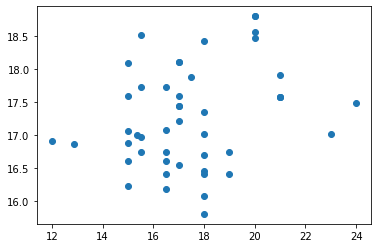

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)